# IRIS dataset classification 
This notebook demonstrates a simple machine learning classification example 
using the well-known IRIS dataset. The code is partly taken from https://www.kaggle.com/skalskip/iris-data-visualization-and-knn-classification 
You can also find more description in that link

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# read the data from the CSV file and extract features and target vectors
dataset = pd.read_csv('Iris.csv')
X = dataset.iloc[:,0:4].values
Y = dataset.iloc[:,4].values
print(X.shape) # mpe: should be 150 samples
print(Y.shape)
type(X) # is: numpy.ndarray
# print the very first row
X.shape # for every flower four values
Y.shape #150 times nothing?
type(dataset) # is: pandas.core.frame.DataFrame
dataset.describe() # create some basic statistics (woaaa!)


(150, 4)
(150,)


,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
# just for testing some of the arrays of numpy
a = np.array([1,2,3])
print(a+1) # broadcasting: add 1 to each value
print(a.shape)
b = np.array([[1], [2], [3]])
print(b.shape)
X
Y

[2 3 4]
(3,)
(3, 1)


array(['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolo

In [18]:
# change the labels from strings to numbers
from sklearn.preprocessing import LabelEncoder # SciKitLearn ... installed by PIP
le = LabelEncoder()
y = le.fit_transform(Y)

# labelling: could be also done by  -> three values
np.unique(Y)

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [24]:
y # just writing something will also print it
b = y+1
b # just nonsense


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [25]:
# separate the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


In [28]:
y_train.shape
y_test.shape
y_test

array(['Virginica', 'Versicolor', 'Setosa', 'Virginica', 'Setosa',
       'Virginica', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor',
       'Virginica', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Setosa', 'Versicolor', 'Versicolor', 'Setosa',
       'Setosa', 'Virginica', 'Versicolor', 'Setosa', 'Setosa',
       'Virginica', 'Setosa', 'Setosa', 'Versicolor', 'Versicolor',
       'Setosa'], dtype=object)

c:\users\kurs\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


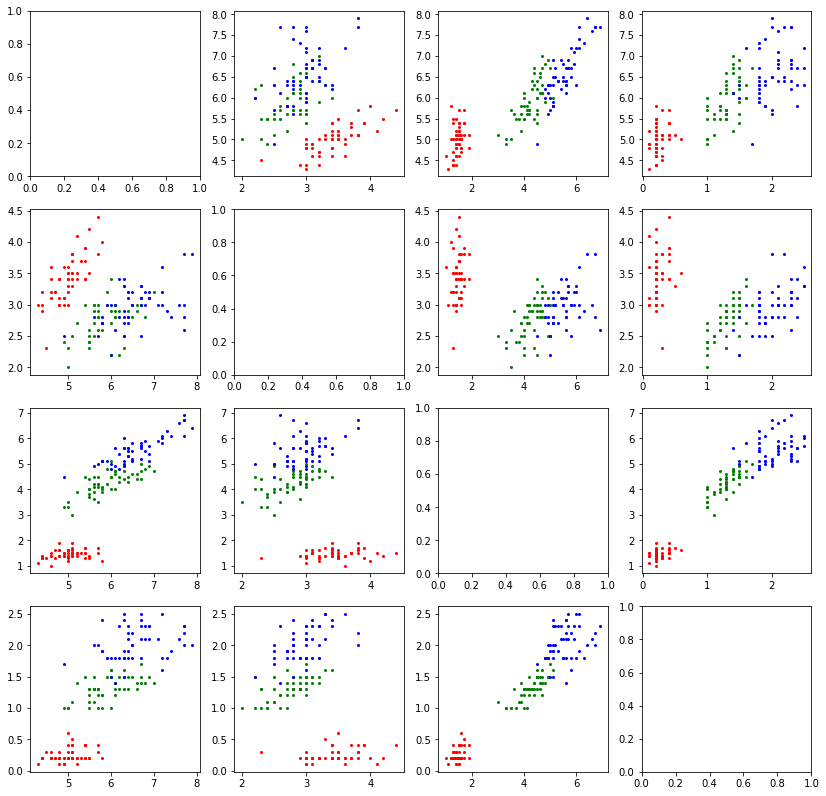

In [29]:
# let us look at the data using tiled subplots
plt.figure(figsize=(14,14))
plt.subplot(4,4,1)

for f1 in range(4):
    for f2 in range(4):
        if (f1 != f2):
            plt.subplot(4,4,f1+(f2)*4+1)
            plt.plot(X[y == 0,f1],X[y == 0,f2], 'o', color='red',markersize=2)
            plt.plot(X[y == 1,f1],X[y == 1,f2], 'o', color='green',markersize=2)
            plt.plot(X[y == 2,f1],X[y == 2,f2], 'o', color='blue',markersize=2)
        else:
            plt.subplot(4,4,f1+(f2)*4+1)

In [ ]:
# doing the actual machine learning. Loading classifiers and evaluation tools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Create an instant of the model for k = 3
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train[:,[0,1,3]], y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test[:,[0,1,3]])

accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

In [ ]:
# Next, let us see which k gives the best results
# creating list of K for KNN
k_list = range(1,50,2)
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
plt.plot(k_list, MSE)

plt.show()

# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=4)
xs = StandardScaler().fit_transform(X)
principalComponents = pca.fit_transform(xs)
print(pca.explained_variance_ratio_)
s = np.linalg.norm(principalComponents[:,0])+np.linalg.norm(principalComponents[:,1])+np.linalg.norm(principalComponents[:,2])+np.linalg.norm(principalComponents[:,3])
print([np.linalg.norm(principalComponents[:,0])/s,np.linalg.norm(principalComponents[:,1])/s,np.linalg.norm(principalComponents[:,2])/s,np.linalg.norm(principalComponents[:,3])/s])
a = np.matmul(pca.components_,xs.T)
x0 = np.linalg.norm(a[0,:])
x1 = np.linalg.norm(a[1,:])
x2 = np.linalg.norm(a[2,:])
x3 = np.linalg.norm(a[3,:])
np.power([x0, x1, x2, x3],2)/np.sum(np.power([x0, x1, x2, x3],2))
plt.plot(a[0,y==0],a[1,y==0], 'o', color='blue',markersize=2)
plt.plot(a[0,y==1],a[1,y==1], 'o', color='red',markersize=2)
plt.plot(a[0,y==2],a[1,y==2], 'o', color='green',markersize=2)